In [1]:
import pandas as pd
import pickle
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessMonthBegin
import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from pprint import pprint
plt.style.use('fivethirtyeight')

In [2]:
rider_return = pd.read_csv('rider_return.csv')

In [15]:
rider_return[rider_return['end_station_id.1']==174]

,ended_at,end_station_id,end_lat,end_lng,end_station_id.1,end_station_name
5249508,2022-06-13 18:00:00,5905,40.734675,-73.99139,174,Broadway & E 14 St


In [ ]:
rider_return['ended_at'] = pd.to_datetime(rider_return['ended_at'])


In [18]:
rider_return_5 = rider_return[(rider_return['end_station_id']==5905)]

In [21]:
rider_return_5['ended_at'] = rider_return_5['ended_at'].astype('datetime64[ns]')

C:\Users\20228\AppData\Local\Temp\ipykernel_34152\2645976163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rider_return_5['ended_at'] = rider_return_5['ended_at'].astype('datetime64[ns]')


In [22]:
rider_return_5['date'] = rider_return_5['ended_at'].dt.date

C:\Users\20228\AppData\Local\Temp\ipykernel_34152\374848556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rider_return_5['date'] = rider_return_5['ended_at'].dt.date


In [25]:
rider_return_5 = rider_return_5[rider_return_5['date']==datetime.date(2022,6,13)]

In [27]:
rider_return_5.rename(columns={'end_station_id.1':'check out'},inplace=True)

C:\Users\20228\AppData\Local\Temp\ipykernel_34152\2545651178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rider_return_5.rename(columns={'end_station_id.1':'check out'},inplace=True)


In [31]:
rider_return_5 = rider_return_5[['ended_at','check out']]

In [41]:
rider_return_5['hour'] = rider_return_5['ended_at'].dt.hour

C:\Users\20228\AppData\Local\Temp\ipykernel_34152\258922994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rider_return_5['hour'] = rider_return_5['ended_at'].dt.hour


<AxesSubplot:xlabel='hour'>

<Figure size 1584x432 with 0 Axes>

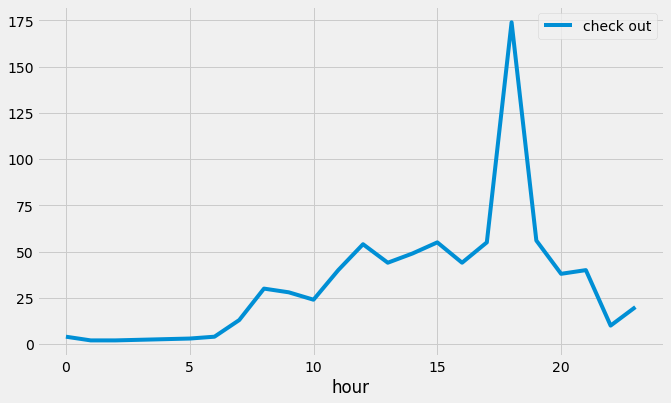

In [42]:
plt.figure(figsize=(22,6))
rider_return_5.plot(x='hour',y='check out',kind='line',figsize=(10,6))

In [50]:
rider_df = pd.read_csv('rider_demand.csv')

In [51]:
rider_df_5 = rider_df[(rider_df['start_station_id']==5905)]

In [52]:
rider_df_5['started_at'] = rider_df_5['started_at'].astype('datetime64[ns]')


C:\Users\20228\AppData\Local\Temp\ipykernel_34152\1883396792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rider_df_5['started_at'] = rider_df_5['started_at'].astype('datetime64[ns]')


In [53]:
rider_df_5['date'] = rider_df_5['started_at'].dt.date

C:\Users\20228\AppData\Local\Temp\ipykernel_34152\2958594379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rider_df_5['date'] = rider_df_5['started_at'].dt.date


In [56]:
rider_df_5 = rider_df_5[rider_df_5['date']==datetime.date(2022,6,13)]
rider_df_5 = rider_df_5[['started_at','start_station_id']]

,started_at,start_station_id,start_lat,start_lng,start_station_id.1,start_station_name,date
5219605,2022-06-13 00:00:00,5905,40.734575,-73.991066,14,Broadway & E 14 St,2022-06-13
5220020,2022-06-13 01:00:00,5905,40.734546,-73.990741,2,Broadway & E 14 St,2022-06-13
5220280,2022-06-13 02:00:00,5905,40.734814,-73.992085,1,University Pl & E 14 St,2022-06-13
5220651,2022-06-13 04:00:00,5905,40.734814,-73.992085,1,University Pl & E 14 St,2022-06-13
5220948,2022-06-13 05:00:00,5905,40.734814,-73.992085,4,University Pl & E 14 St,2022-06-13
5221505,2022-06-13 06:00:00,5905,40.734814,-73.992085,3,University Pl & E 14 St,2022-06-13
5222311,2022-06-13 07:00:00,5905,40.734816,-73.992084,12,University Pl & E 14 St,2022-06-13
5223264,2022-06-13 08:00:00,5905,40.734812,-73.992086,26,University Pl & E 14 St,2022-06-13
5224245,2022-06-13 09:00:00,5905,40.734809,-73.992087,26,University Pl & E 14 St,2022-06-13
5225117,2022-06-13 10:00:00,5905,40.734813,-73.992093,19,University Pl & E 14 St,2022-06-13


In [58]:
rider_df_5.rename(columns={'start_station_id.1':'check in'},inplace=True)

In [59]:
rider_df_5['hour'] = rider_df_5['started_at'].dt.hour

<AxesSubplot:xlabel='hour'>

<Figure size 1584x432 with 0 Axes>

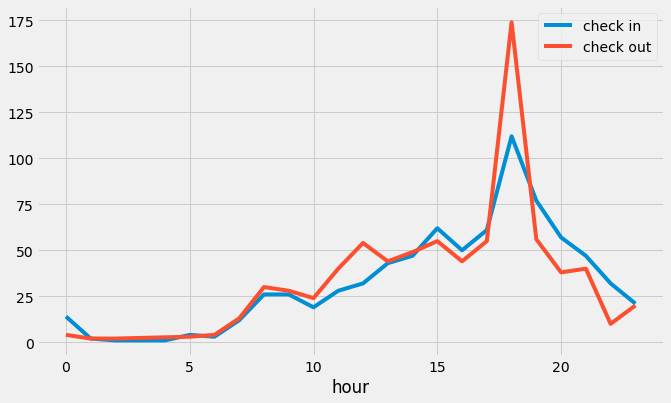

In [70]:
plt.figure(figsize=(22,6))
ax = rider_df_5.plot(x='hour',y='check in',kind='line',figsize=(10,6))
rider_return_5.plot(x='hour',y='check out',kind='line',figsize=(10,6),ax=ax)

In [65]:
rider_df_5

,started_at,start_station_id,start_lat,start_lng,check in,start_station_name,date,hour
5219605,2022-06-13 00:00:00,5905,40.734575,-73.991066,14,Broadway & E 14 St,2022-06-13,0
5220020,2022-06-13 01:00:00,5905,40.734546,-73.990741,2,Broadway & E 14 St,2022-06-13,1
5220280,2022-06-13 02:00:00,5905,40.734814,-73.992085,1,University Pl & E 14 St,2022-06-13,2
5220651,2022-06-13 04:00:00,5905,40.734814,-73.992085,1,University Pl & E 14 St,2022-06-13,4
5220948,2022-06-13 05:00:00,5905,40.734814,-73.992085,4,University Pl & E 14 St,2022-06-13,5
5221505,2022-06-13 06:00:00,5905,40.734814,-73.992085,3,University Pl & E 14 St,2022-06-13,6
5222311,2022-06-13 07:00:00,5905,40.734816,-73.992084,12,University Pl & E 14 St,2022-06-13,7
5223264,2022-06-13 08:00:00,5905,40.734812,-73.992086,26,University Pl & E 14 St,2022-06-13,8
5224245,2022-06-13 09:00:00,5905,40.734809,-73.992087,26,University Pl & E 14 St,2022-06-13,9
5225117,2022-06-13 10:00:00,5905,40.734813,-73.992093,19,University Pl & E 14 St,2022-06-13,10


In [ ]:
ax = df1.plot()
